In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

%matplotlib inline

dataset_path = 'vitals_missing_value_linear__202110081622.csv'

In [2]:
df = pd.read_csv(dataset_path)
df.head()

,t0,t,t1,sbp_y0,sbp_y,sbp_y1,dbp_y0,dbp_y,dbp_y1,hr_y0,...,tempc_y1,spo2_y0,spo2_y,spo2_y1,sbp_yhat,dbp_yhat,hr_yhat,rr_yhat,tempc_yhat,spo2_yhat
0,0,240.0,480.0,114.0,125.0,112.0,63.0,65.0,57.0,73.0,...,38.000000,100.0,98.0,99.0,113.000000,60.000000,75.000000,27.500000,37.916659,99.5
1,0,240.0,420.0,118.0,107.0,93.0,70.0,42.0,51.0,86.0,...,36.388895,100.0,100.0,100.0,103.714286,59.142857,91.714286,24.857143,36.341279,100.0
2,0,240.0,480.0,125.0,135.0,101.0,69.0,58.0,55.0,77.0,...,38.000000,94.0,94.0,93.0,113.000000,62.000000,73.000000,24.500000,37.500000,93.5
3,0,240.0,480.0,105.0,105.0,100.0,53.0,51.0,48.0,116.0,...,37.111111,99.0,100.0,99.0,102.500000,50.500000,117.000000,29.000000,37.055556,99.0
4,0,240.0,480.0,90.0,91.0,112.0,51.0,50.0,61.0,52.0,...,36.222210,100.0,100.0,100.0,101.000000,56.000000,55.000000,13.500000,36.694446,100.0


여기서 y값을 yhat 즉, linear interpolation 값과 비교한다.

## All Vital Sign T-test

In [4]:
def t_test(vital_name):
    
    y = df[vital_name+'_y']
    yhat = df[vital_name+'_yhat']
    
    # from scipy import stats
    # 서로 다른 두 표본이라 볼 수 있으므로
    tstat, pval = stats.ttest_ind(a=y, b=yhat, equal_var = False)
    
    print('>> ' +vital_name + " T-test rsult  >>" )
    print(f't={tstat:.5f}, p={pval:.5f}')
    print('----------------------------------')
    print('')

In [5]:
vitals = ['sbp', 'dbp', 'hr', 'rr', 'tempc', 'spo2']

for v in vitals:
    t_test(v)

>> sbp T-test rsult  >>
t=0.05251, p=0.95812
----------------------------------

>> dbp T-test rsult  >>
t=-0.25480, p=0.79888
----------------------------------

>> hr T-test rsult  >>
t=-0.20353, p=0.83873
----------------------------------

>> rr T-test rsult  >>
t=0.45133, p=0.65176
----------------------------------

>> tempc T-test rsult  >>
t=-0.45142, p=0.65169
----------------------------------

>> spo2 T-test rsult  >>
t=-0.29062, p=0.77135
----------------------------------



이들의 평균 p=0.77842<br>
모든 vital들의 p가 0.05보다 크므로 H0는 기각되지 않는다.<br>
즉, 두 표본의 평균은 같다고 볼 수 있다.

## T-test2

In [8]:
def t_test2(vital_name):
    import researchpy as rp
    
    y = df[vital_name+'_y']
    yhat = df[vital_name+'_yhat']
    
    summary, rst = rp.ttest(group1=y, group1_name='Y'
                           ,group2=yhat, group2_name='linear interpolation')
    
    print('------------ ' + vital_name + ' -------------')
    print(display(summary))
    print('')
    print(display(rst)) 
    print('')
    print('')

In [9]:
vitals = ['sbp', 'dbp', 'hr', 'rr', 'tempc', 'spo2']

for v in vitals:
    t_test2(v)

------------ sbp -------------


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Y,10000.0,122.288333,22.689432,0.226894,121.843575,122.733092
1,linear interpolation,10000.0,122.272326,20.359478,0.203595,121.873240,122.671413
2,combined,20000.0,122.280330,21.555421,0.152420,121.981574,122.579085


None



,Independent t-test,results
0,Difference (Y - linear interpolation) =,0.0160
1,Degrees of freedom =,19998.0000
2,t =,0.0525
3,Two side test p value =,0.9581
4,Difference < 0 p value =,0.5209
5,Difference > 0 p value =,0.4791
6,Cohen's d =,0.0007
7,Hedge's g =,0.0007
8,Glass's delta =,0.0007
9,Pearson's r =,0.0004


None


------------ dbp -------------


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Y,10000.0,59.655883,13.741628,0.137416,59.386520,59.925247
1,linear interpolation,10000.0,59.702818,12.266343,0.122663,59.462373,59.943263
2,combined,20000.0,59.679351,13.024585,0.092098,59.498832,59.859870


None



,Independent t-test,results
0,Difference (Y - linear interpolation) =,-0.0469
1,Degrees of freedom =,19998.0000
2,t =,-0.2548
3,Two side test p value =,0.7989
4,Difference < 0 p value =,0.3994
5,Difference > 0 p value =,0.6006
6,Cohen's d =,-0.0036
7,Hedge's g =,-0.0036
8,Glass's delta =,-0.0034
9,Pearson's r =,0.0018


None


------------ hr -------------


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Y,10000.0,87.893250,17.055571,0.170556,87.558926,88.227574
1,linear interpolation,10000.0,87.941035,16.135597,0.161356,87.624745,88.257325
2,combined,20000.0,87.917143,16.601560,0.117391,87.687047,88.147238


None



,Independent t-test,results
0,Difference (Y - linear interpolation) =,-0.0478
1,Degrees of freedom =,19998.0000
2,t =,-0.2035
3,Two side test p value =,0.8387
4,Difference < 0 p value =,0.4194
5,Difference > 0 p value =,0.5806
6,Cohen's d =,-0.0029
7,Hedge's g =,-0.0029
8,Glass's delta =,-0.0028
9,Pearson's r =,0.0014


None


------------ rr -------------


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Y,10000.0,20.601385,6.176594,0.061766,20.480311,20.722459
1,linear interpolation,10000.0,20.564059,5.499503,0.054995,20.456258,20.671861
2,combined,20000.0,20.582722,5.847740,0.041350,20.501673,20.663771


None



,Independent t-test,results
0,Difference (Y - linear interpolation) =,0.0373
1,Degrees of freedom =,19998.0000
2,t =,0.4513
3,Two side test p value =,0.6518
4,Difference < 0 p value =,0.6741
5,Difference > 0 p value =,0.3259
6,Cohen's d =,0.0064
7,Hedge's g =,0.0064
8,Glass's delta =,0.0060
9,Pearson's r =,0.0032


None


------------ tempc -------------


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Y,10000.0,37.152762,0.832836,0.008328,37.136436,37.169087
1,linear interpolation,10000.0,37.157853,0.760630,0.007606,37.142943,37.172763
2,combined,20000.0,37.155307,0.797535,0.005639,37.144254,37.166361


None



,Independent t-test,results
0,Difference (Y - linear interpolation) =,-0.0051
1,Degrees of freedom =,19998.0000
2,t =,-0.4514
3,Two side test p value =,0.6517
4,Difference < 0 p value =,0.3258
5,Difference > 0 p value =,0.6742
6,Cohen's d =,-0.0064
7,Hedge's g =,-0.0064
8,Glass's delta =,-0.0061
9,Pearson's r =,0.0032


None


------------ spo2 -------------


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Y,10000.0,97.280650,3.212724,0.032127,97.217674,97.343626
1,linear interpolation,10000.0,97.293219,2.895666,0.028957,97.236459,97.349980
2,combined,20000.0,97.286935,3.058236,0.021625,97.244548,97.329322


None



,Independent t-test,results
0,Difference (Y - linear interpolation) =,-0.0126
1,Degrees of freedom =,19998.0000
2,t =,-0.2906
3,Two side test p value =,0.7713
4,Difference < 0 p value =,0.3857
5,Difference > 0 p value =,0.6143
6,Cohen's d =,-0.0041
7,Hedge's g =,-0.0041
8,Glass's delta =,-0.0039
9,Pearson's r =,0.0021


None




https://www.pythonfordatascience.org/independent-samples-t-test-python/

## Homogeneity of variance

In [24]:
def showHistOfVital(vital_name):
    
    y = df[vital_name+'_y']
    yhat = df[vital_name+'_yhat']
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)

    p_y = plt.hist(y, label='Y', density=True, alpha=0.75)
    p_yhat = plt.hist(yhat, label='linear', density=True, alpha=0.75)
 
    plt.suptitle('Distribution of '+ vital_name + '\n between y and yhat', fontsize=20)
    plt.xlabel('Y', fontsize=16)
    plt.ylabel('Probability density', fontsize=16)

    plt.text(0, .025, f'$\mu= {yhat.mean():.1f}, \ \sigma= {yhat.std():.1f}$')
    plt.text(2.5, .025, f'$\mu= {y.mean():.1f}, \ \sigma= {y.std():.1f}$')

    plt.show()

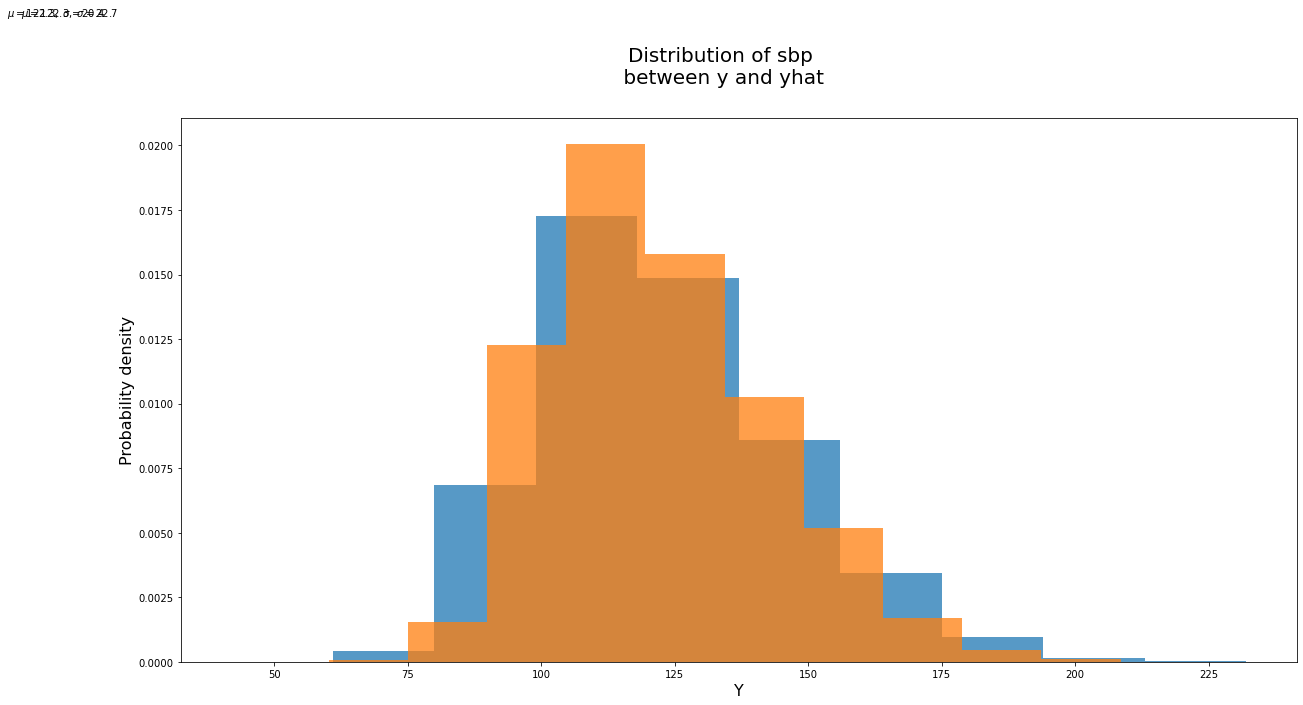

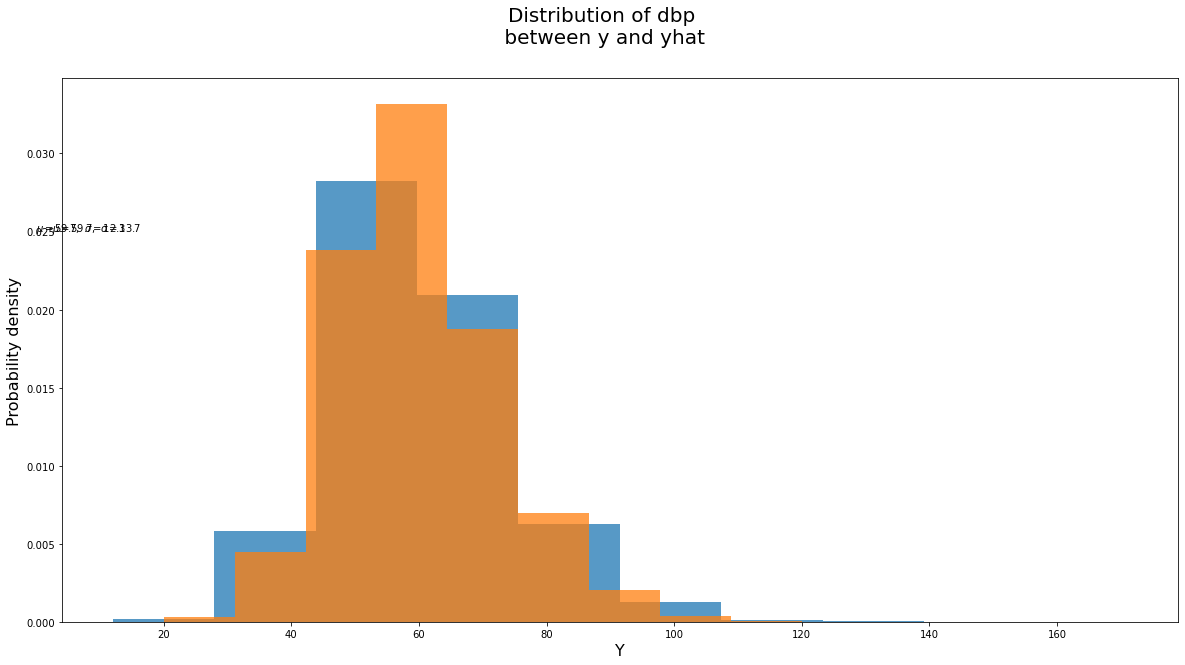

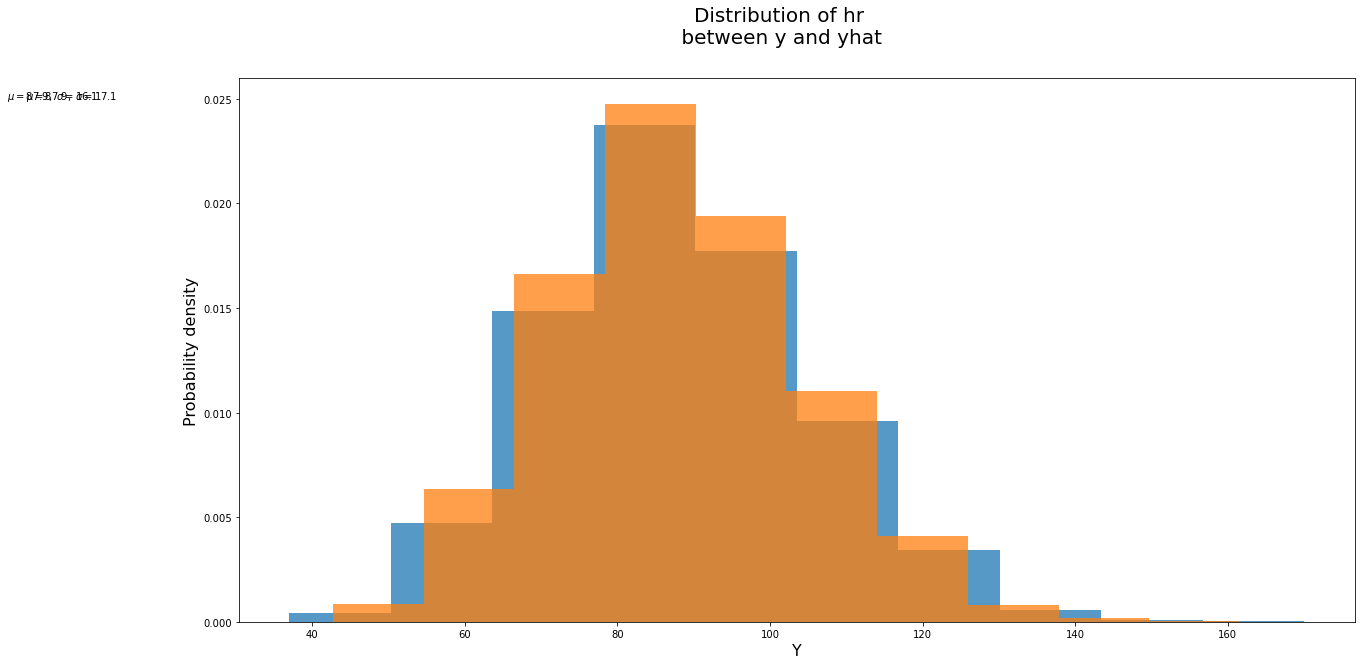

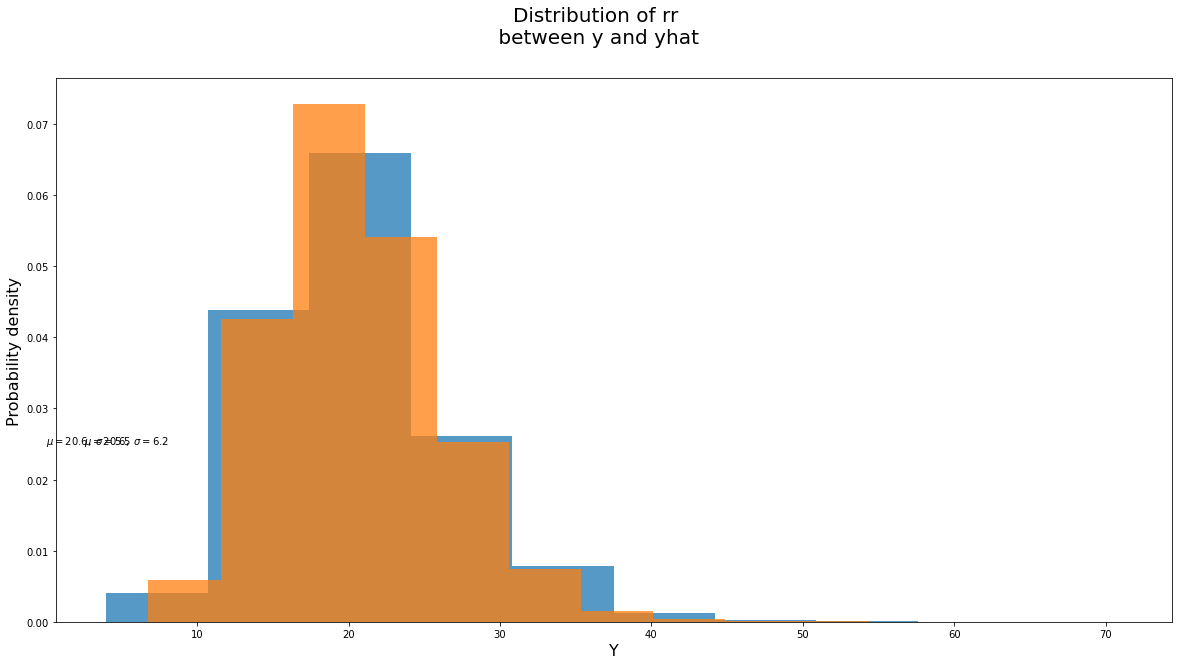

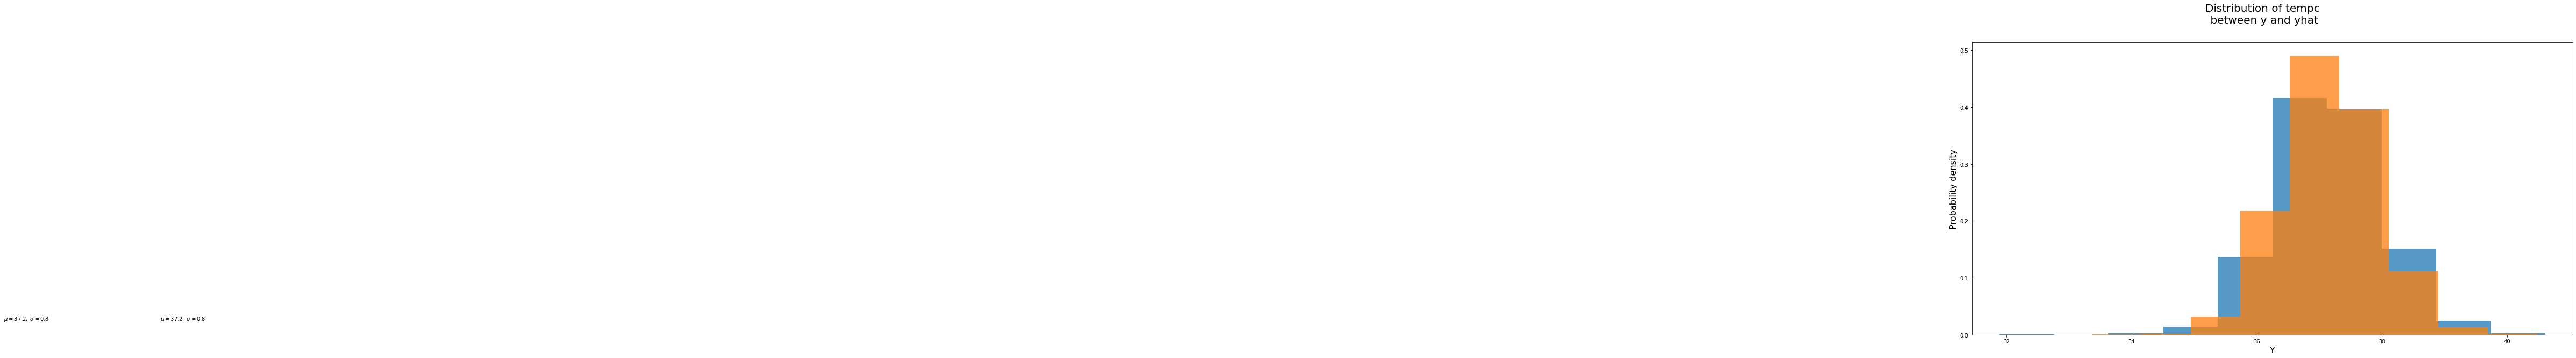

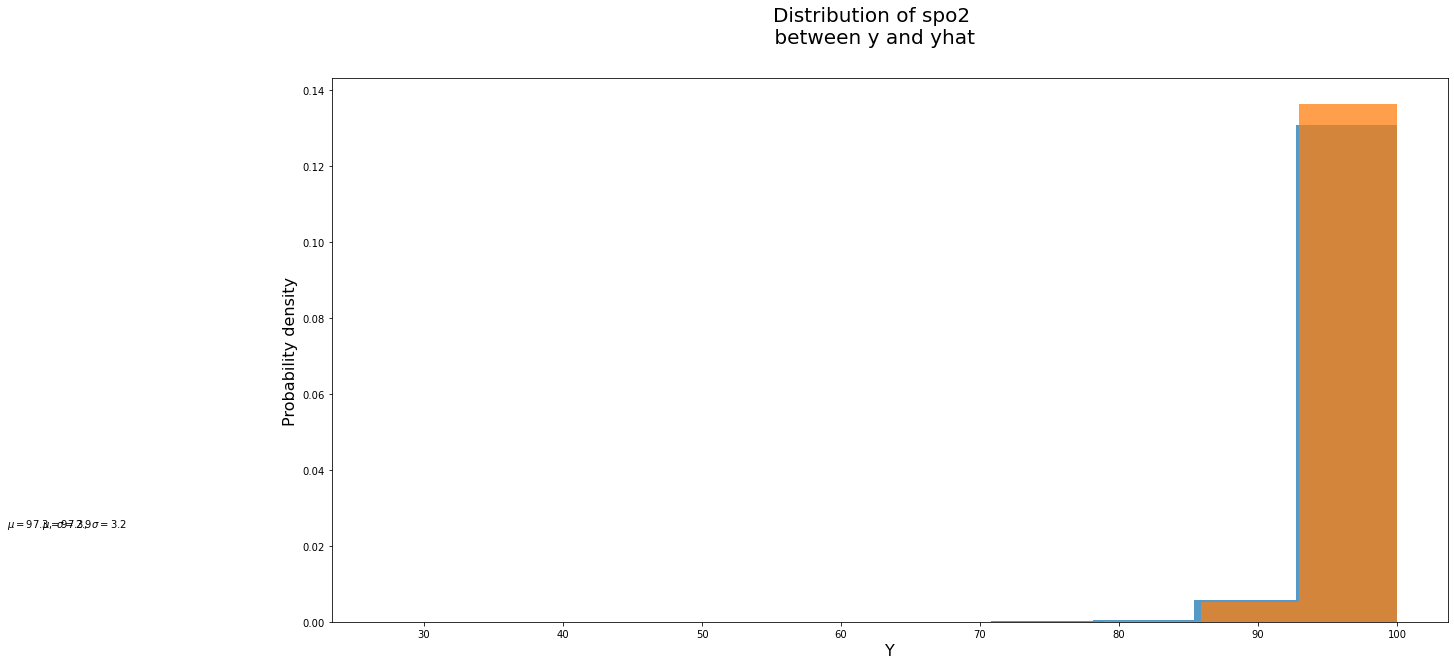

In [25]:
vitals = ['sbp', 'dbp', 'hr', 'rr', 'tempc', 'spo2']

for v in vitals:
    showHistOfVital(v)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [27]:
def display_score(vital_name):
    
    y = df[vital_name+'_y']
    yhat = df[vital_name+'_yhat']
    
    print('------------ ' + vital_name + ' -------------')
    
    print('MSE: ', mean_squared_error(y, yhat))
    print('RMSE: ', np.sqrt(mean_squared_error(y, yhat)))
    print('Variance Regression Score: ', explained_variance_score(y, yhat))
    
    print('')
    print('')

In [28]:
vitals = ['sbp', 'dbp', 'hr', 'rr', 'tempc', 'spo2']

for v in vitals:
    display_score(v)

------------ sbp -------------
MSE:  240.9876473541732
RMSE:  15.523776839228693
Variance Regression Score:  0.5318441055844019


------------ dbp -------------
MSE:  91.47158462708586
RMSE:  9.56407782418597
Variance Regression Score:  0.5155568620656634


------------ hr -------------
MSE:  70.45961033084171
RMSE:  8.394022297494908
Variance Regression Score:  0.7577649171860512


------------ rr -------------
MSE:  19.131985096297658
RMSE:  4.3740124709810395
Variance Regression Score:  0.4984967364981512


------------ tempc -------------
MSE:  0.18081064202644095
RMSE:  0.42521834629568955
Variance Regression Score:  0.7393332348847246


------------ spo2 -------------
MSE:  6.425596655106637
RMSE:  2.534876063066326
Variance Regression Score:  0.3774137930792727




In [32]:
def display_plot(vital_name):
    
    y = df[vital_name+'_y']
    yhat = df[vital_name+'_yhat']
    
    f, axes = plt.subplots(1, 2, figsize=(15,5))
    
    # our model predictions
    plt.scatter(y, yhat)
    
    # perfect predictions
    plt.plot(y, y, 'r') # 빨간 선
    
    errors = y - yhat
    sns.distplot(errors, ax=axes[0]) # 각 row의 y, yhat의 residual을 이산확률분포로 그렸다.
    
    sns.despine(left=True, bottom=True)
    axes[0].set(xlabel='Error', ylabel='', title=vital_name + ' Error Histogram')
    axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title=vital_name + ' Model Prediction vs Perfect Fit')

C:\Users\david\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\david\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\david\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

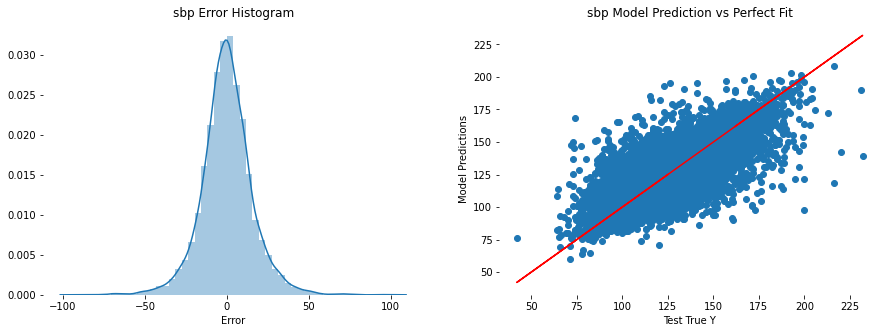

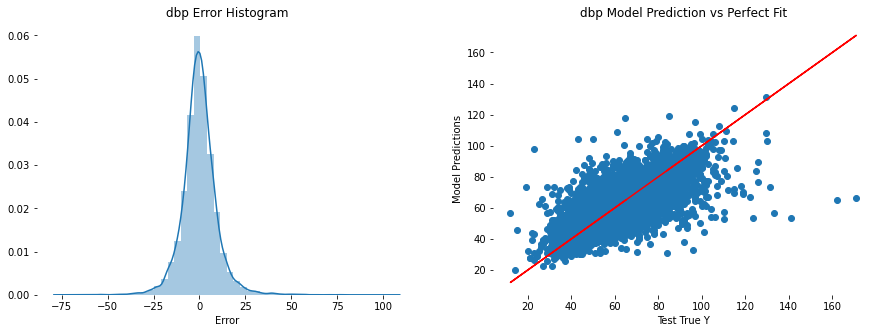

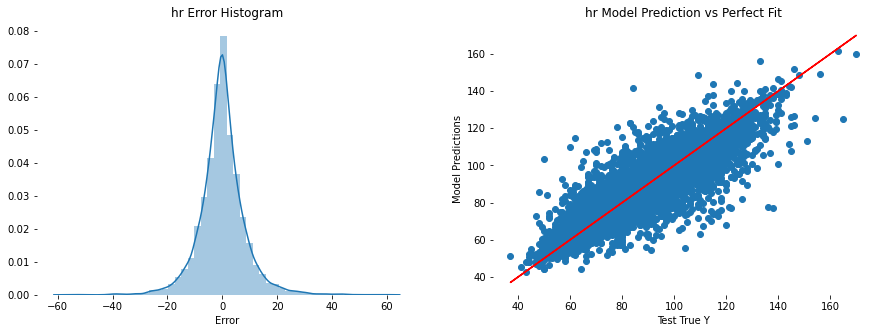

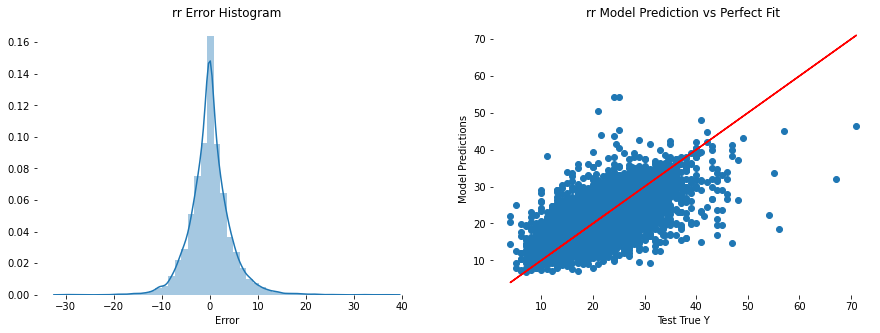

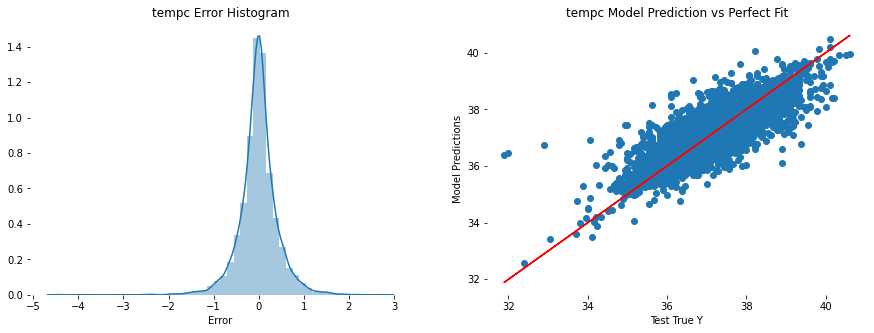

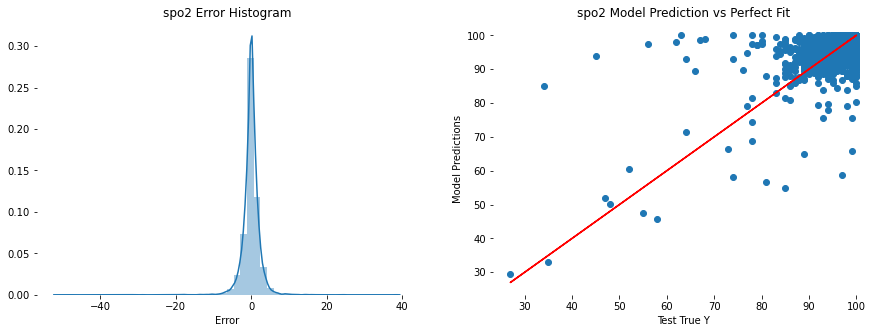

In [33]:
vitals = ['sbp', 'dbp', 'hr', 'rr', 'tempc', 'spo2']
for v in vitals:
    display_plot(v)

모든 vital sign들의 residual이 0 주변을 평균으로 분산을 이루고 있으므로 오차가 크지 않다고 볼 수 있다.<br>
<br>
산포도의 경우, Perfect fit을 중심으로 예측값들이 분산되어 있는 것을 볼 수 있다.

In [37]:
id = np.random.randint(0, 10000, size=1)[0]

sample = df.iloc[id]

print(display(sample))

t0              0.000000
t             180.000000
t1            315.000000
sbp_y0        104.000000
sbp_y         102.000000
sbp_y1        101.000000
dbp_y0         43.000000
dbp_y          50.000000
dbp_y1         46.000000
hr_y0          57.000000
hr_y           58.000000
hr_y1          54.000000
rr_y0          19.000000
rr_y           16.000000
rr_y1          17.000000
tempc_y0       36.722210
tempc_y        37.166683
tempc_y1       37.388896
spo2_y0        98.000000
spo2_y         95.000000
spo2_y1        99.000000
sbp_yhat      102.285714
dbp_yhat       44.714286
hr_yhat        55.285714
rr_yhat        17.857143
tempc_yhat     37.103173
spo2_yhat      98.571429
Name: 4397, dtype: float64

None


랜덤한 값을 하나 끄집어 낸다.